In [3]:
import numpy

In [4]:
import matplotlib

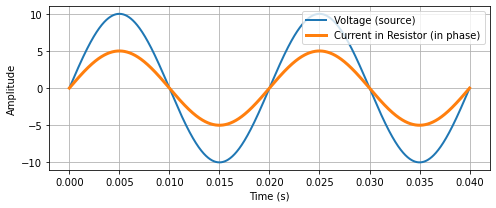

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Circuit Parameters ---
R = 2.0             # Resistance (Ohms)
L = 0.1             # Inductance (Henries)
C = 0.0001          # Capacitance (Farads)
Vp = 10.0           # Voltage amplitude (Volts)

freq = 50              # frequency f=50 Hz
w = 2 * np.pi * freq   # omega [rad/sec]

# ==============================
# TIME-DOMAIN AC ANALYSIS
# ==============================
# --- Time Range ---
t = np.linspace(0, 2/freq, 2000)   # Time vector (2 cycles)

# -------------------------------
# Voltage source
# -------------------------------
v = Vp * np.sin(w * t)

# -------------------------------
# Currents through each element
# -------------------------------
# Resistor: i_R = v / R
i_R = v / R

# Inductor: i_L = (1/L) ∫ v dt  => for sinusoid: i_L = (V0/(wL)) * -cos(wt)
i_L = (Vp / (w * L)) * (-np.cos(w * t))

# Capacitor: i_C = C dv/dt = C * V0*w*cos(wt)
i_C = C * Vp * w * np.cos(w * t)


# -------------------------------
# Plotting
# -------------------------------
plt.figure(figsize=(7, 3))

plt.plot(t, v, label="Voltage (source)", linewidth=2)
plt.plot(t, i_R, label="Current in Resistor (in phase)", linewidth=3)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
#plt.title("Voltage and Current in R under sinusoidal excitation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Resonant frequency: 50.33 Hz


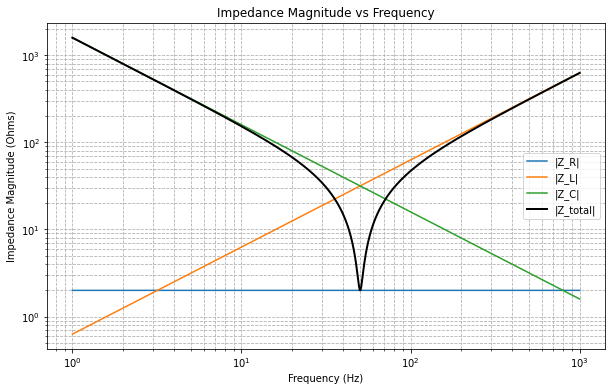

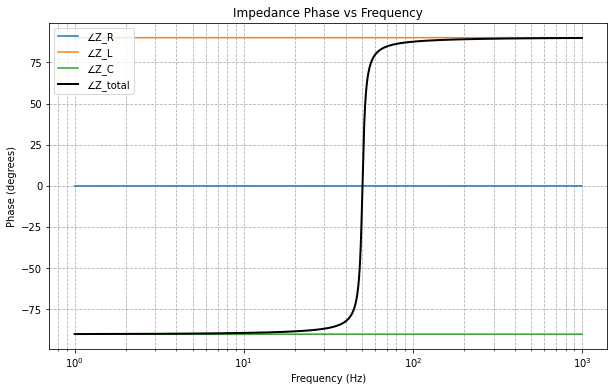

In [6]:
# ==============================
# FREQUENCY-DOMAIN IMPEDANCE ANALYSIS
# ==============================

# --- Frequency Range ---
# Create a range of frequencies to sweep (e.g., from 1 Hz to 200 Hz)
f_start = 1
f_stop = 1000
num_points = 5000
f = np.linspace(f_start, f_stop, num_points)
omega = 2 * np.pi * f

# Impedances of R, L, C
Z_R = R + 0j
Z_L = 1j * omega * L
Z_C = 1 / (1j * omega * C)

# Total series impedance
Z_total = Z_R + Z_L + Z_C

# Magnitudes
Z_R_mag = np.abs(Z_R)
Z_L_mag = np.abs(Z_L)
Z_C_mag = np.abs(Z_C)
Z_tot_mag = np.abs(Z_total)

# Phases (in degrees)
Z_R_phase = np.angle(Z_R, deg=True)
Z_L_phase = np.angle(Z_L, deg=True)
Z_C_phase = np.angle(Z_C, deg=True)
Z_tot_phase = np.angle(Z_total, deg=True)

# --- Find Resonant Frequency (Theoretical) ---
# Resonant frequency f_0 = 1 / (2 * pi * sqrt(L * C))
f_0 = 1 / (2 * np.pi * np.sqrt(L * C))
print(f"Resonant frequency: {f_0:.2f} Hz")

# -------------------------------
# Plot Magnitude
# -------------------------------
plt.figure(figsize=(10, 6))
plt.loglog(f, Z_R_mag * np.ones_like(f), label="|Z_R|")
plt.loglog(f, Z_L_mag, label="|Z_L|")
plt.loglog(f, Z_C_mag, label="|Z_C|")
plt.loglog(f, Z_tot_mag, 'k', linewidth=2, label="|Z_total|")

plt.title("Impedance Magnitude vs Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Magnitude (Ohms)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# -------------------------------
# Plot Phase
# -------------------------------
plt.figure(figsize=(10, 6))
plt.semilogx(f, Z_R_phase * np.ones_like(f), label="∠Z_R")
plt.semilogx(f, Z_L_phase, label="∠Z_L")
plt.semilogx(f, Z_C_phase, label="∠Z_C")
plt.semilogx(f, Z_tot_phase, 'k', linewidth=2, label="∠Z_total")

plt.title("Impedance Phase vs Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

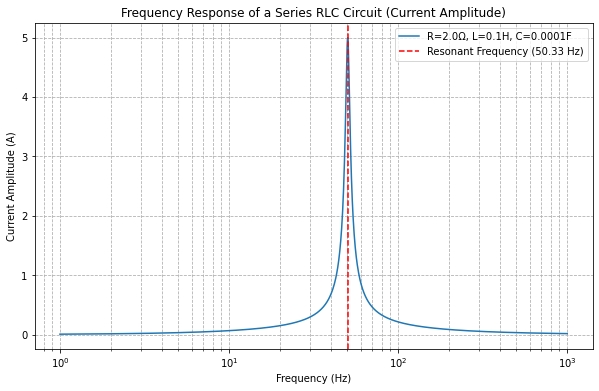

In [7]:
def rlc_series_current(R, L, C, V_amplitude, frequencies):
    """
    Calculates the current amplitude in a series RLC circuit for given frequencies.

    Args:
        R (float): Resistance in Ohms.
        L (float): Inductance in Henries.
        C (float): Capacitance in Farads.
        V_amplitude (float): Amplitude of the source voltage in Volts.
        frequencies (np.array): Array of frequencies in Hz.

    Returns:
        np.array: Array of current amplitudes in Amperes.
    """
    # Convert frequencies (Hz) to angular frequencies (rad/s)
    omega = 2 * np.pi * frequencies

    # Calculate inductive reactance (XL) and capacitive reactance (XC)
    X_L = omega * L
    X_C = 1 / (omega * C)

    # Calculate total impedance (Z)
    # Z = sqrt(R^2 + (XL - XC)^2)
    Z = np.sqrt(R**2 + (X_L - X_C)**2)

    # Calculate current amplitude using Ohm's law (I = V / Z)
    I = V_amplitude / Z

    return I

# --- Calculate Current ---
currents = rlc_series_current(R, L, C, Vp, f)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
#plt.plot(f, currents, label=f'R={R}Ω, L={L}H, C={C}F')      #linear plot
plt.semilogx(f, currents, label=f'R={R}Ω, L={L}H, C={C}F')  #semilog plot
plt.axvline(x=f_0, color='r', linestyle='--', label=f'Resonant Frequency ({f_0:.2f} Hz)')
plt.title('Frequency Response of a Series RLC Circuit (Current Amplitude)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current Amplitude (A)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

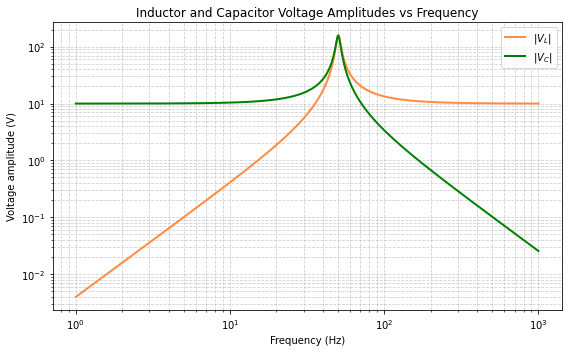

In [8]:
# Current amplitude
I_mag = Vp / np.abs(Z_total)

# Voltage amplitudes
V_L_mag = I_mag * np.abs(Z_L)
V_C_mag = I_mag * np.abs(Z_C)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.loglog(f, V_L_mag, label=r'$|V_L|$', linewidth=2, color='#FF8C42')
plt.loglog(f, V_C_mag, label=r'$|V_C|$', linewidth=2, color='g')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage amplitude (V)")
plt.title("Inductor and Capacitor Voltage Amplitudes vs Frequency")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

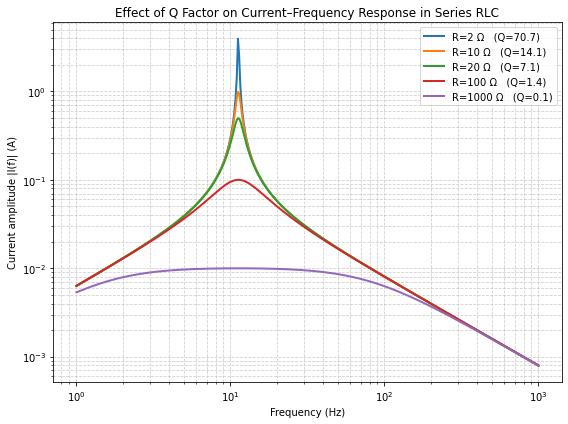

In [13]:
# --- Circuit parameters ---
R_values = [2, 10, 20, 100, 1000]   # choose resistances to vary Q
L = 2.0
C = 0.0001
V0 = 10.0  # source amplitude

# Compute impedance terms
Z_L = 1j * omega * L
Z_C = 1/(1j * omega * C)

plt.figure(figsize=(8,6))

# --- Loop through each R (thus each Q) ---
for R in R_values:
    Z_total = R + Z_L + Z_C
    I_mag = V0 / np.abs(Z_total)
    
    # Q-factor at resonance
    w0 = 1 / np.sqrt(L*C)
    Q = w0 * L / R
    
    plt.loglog(f, I_mag, linewidth=2, label=f"R={R} Ω   (Q={Q:.1f})")

# --- Plot formatting ---
plt.xlabel("Frequency (Hz)")
plt.ylabel("Current amplitude |I(f)| (A)")
plt.title("Effect of Q Factor on Current–Frequency Response in Series RLC")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()